In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/alz.zip'

In [ ]:
for root, dirs, files in os.walk(extract_folder):
    print("Checking:", root)
    print("Files:", files)
    print("-" * 40)

Checking: /content/alzt_data
Files: []
----------------------------------------
Checking: /content/alzt_data/Alzheimer_s Dataset
Files: []
----------------------------------------
Checking: /content/alzt_data/Alzheimer_s Dataset/test
Files: []
----------------------------------------
Checking: /content/alzt_data/Alzheimer_s Dataset/test/VeryMildDemented
Files: ['31.jpg', '30 (13).jpg', '32 (33).jpg', '28 (68).jpg', '31 (29).jpg', '28 (5).jpg', '29 (52).jpg', '31 (45).jpg', '32 (40).jpg', '30 (12).jpg', '27 (10).jpg', '29 (63).jpg', '29 (7).jpg', '31 (12).jpg', '27 (9).jpg', '30 (36).jpg', '31 (4).jpg', '31 (44).jpg', '27 (31).jpg', '26 (46).jpg', '27 (14).jpg', '27 (57).jpg', '30 (10).jpg', '29 (18).jpg', '32 (38).jpg', '28 (29).jpg', '30 (38).jpg', '29 (57).jpg', '26 (63).jpg', '27 (53).jpg', '28 (42).jpg', '31 (38).jpg', '29 (49).jpg', '28 (23).jpg', '30 (66).jpg', '27 (18).jpg', '31 (9).jpg', '31 (64).jpg', '28 (38).jpg', '31 (30).jpg', '29 (65).jpg', '31 (7).jpg', '27 (42).jpg', '2

In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/alz.zip"  # Update if in a subfolder
extract_path = "/content/alz"  # This is where it will be unzipped

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)
print("Contents:", os.listdir(extract_path))


Extracted to: /content/alz
Contents: ['Alzheimer_s Dataset']


In [ ]:
import os

alz_dataset_path = os.path.join(extract_path, "Alzheimer_s Dataset")  # Adjust if name is different
print("Inside Alzheimer_s Dataset:", os.listdir(alz_dataset_path))

train_dir = os.path.join(alz_dataset_path, "train")
test_dir = os.path.join(alz_dataset_path, "test")

print("Train classes:", os.listdir(train_dir))
print("Test classes:", os.listdir(test_dir))


Inside Alzheimer_s Dataset: ['test', 'train']
Train classes: ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
Test classes: ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = "/content/alz/Alzheimer_s Dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [ ]:
IMG_SIZE = (224, 224)  # Resize target for CNNs like ResNet/VGG
BATCH_SIZE = 32

# Train with augmentation and validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

# Test data generator (only normalization)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


Baseline for CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # For 4 dementia classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(1.7848432055749128), 1: np.float64(24.392857142857142), 2: np.float64(0.500244140625), 3: np.float64(0.7144351464435147)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Convert class_weights (NumPy array) to a dictionary
class_weights_dict = dict(enumerate(class_weights))

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    class_weight=class_weights_dict,  # Use the dictionary here
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 123s 571ms/step - accuracy: 0.1650 - loss: 17.8746 - val_accuracy: 0.0098 - val_loss: 3.5653
Epoch 2/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 63s 487ms/step - accuracy: 0.0115 - loss: 1.4218 - val_accuracy: 0.0860 - val_loss: 1.6472
Epoch 3/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 61s 471ms/step - accuracy: 0.0094 - loss: 1.3447 - val_accuracy: 0.0108 - val_loss: 1.3934
Epoch 4/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 61s 472ms/step - accuracy: 0.0121 - loss: 1.4476 - val_accuracy: 0.0098 - val_loss: 1.3918
Epoch 5/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 469ms/step - accuracy: 0.0104 - loss: 1.3993 - val_accuracy: 0.0098 - val_loss: 1.3904
Epoch 6/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 83s 475ms/step - accuracy: 0.0103 - loss: 1.4042 - val_accuracy: 0.0098 - val_loss: 1.3889
Epoch 7/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 466ms/step - accuracy: 0.0111 - loss: 1.4087 - val_accuracy: 0.0098 - val_loss: 1.3889
Epoch 8/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 465ms/step - accuracy: 0.1061 - loss:

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,510,222 (127.83 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 22,339,850 (85.22 MB)

In [ ]:
EPOCHS = 15  # You can increase this later for better performance

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=EPOCHS,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 66s 486ms/step - accuracy: 0.4175 - loss: 1.3665 - val_accuracy: 0.5005 - val_loss: 1.3054
Epoch 2/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 57s 445ms/step - accuracy: 0.4943 - loss: 1.2902 - val_accuracy: 0.5005 - val_loss: 1.2469
Epoch 3/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 463ms/step - accuracy: 0.4928 - loss: 1.2417 - val_accuracy: 0.5005 - val_loss: 1.2064
Epoch 4/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 58s 449ms/step - accuracy: 0.4889 - loss: 1.2026 - val_accuracy: 0.5005 - val_loss: 1.1770
Epoch 5/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 67s 524ms/step - accuracy: 0.5085 - loss: 1.1661 - val_accuracy: 0.5005 - val_loss: 1.1544
Epoch 6/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 72s 445ms/step - accuracy: 0.5023 - loss: 1.1520 - val_accuracy: 0.5005 - val_loss: 1.1374
Epoch 7/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 456ms/step - accuracy: 0.4916 - loss: 1.1374 - val_accuracy: 0.5005 - val_loss: 1.1237
Epoch 8/15
129/129 ━━━━━━━━━━━━━━━━━━━━ 82s 455ms/step - accuracy: 0.4936 - loss: 1

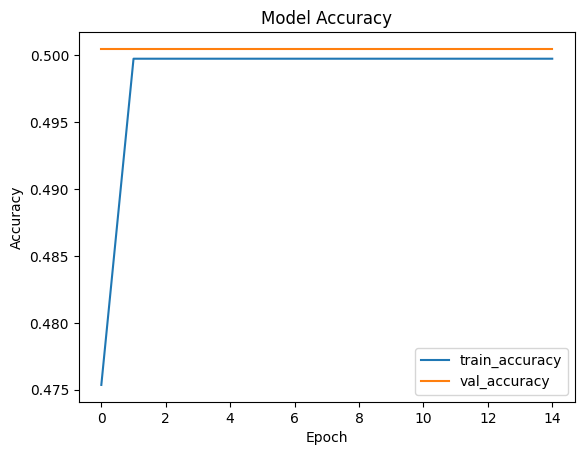

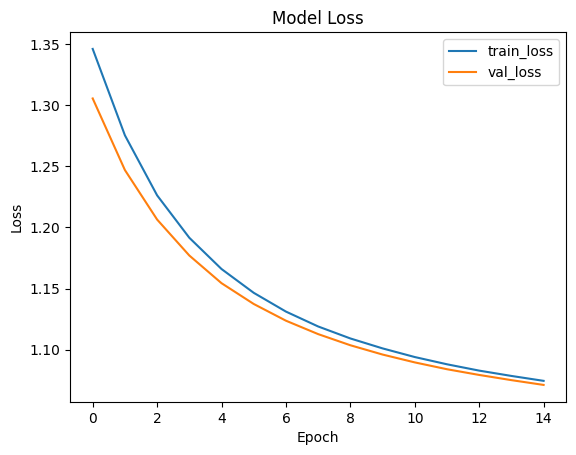

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/alz.zip"
extract_path = "/content/alz"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/alz/Alzheimer_s Dataset/test"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
loss,accuracy=model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.5026 - loss: 1.3293
Test Loss: 1.0707
Test Accuracy: 0.5004


In [ ]:
import numpy as np

pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(true_classes, pred_classes, target_names=class_labels)
print(report)

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


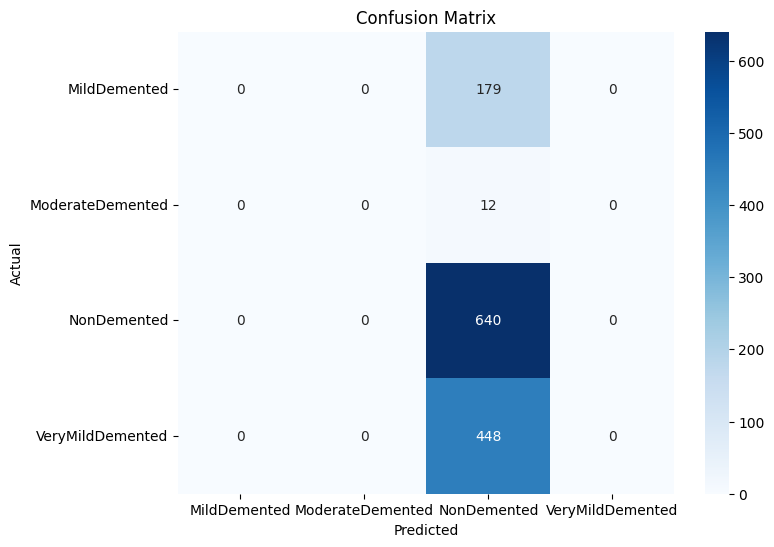

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Split 20% for validation
)

train_generator = train_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(1.7848432055749128), 1: np.float64(24.392857142857142), 2: np.float64(0.500244140625), 3: np.float64(0.7144351464435147)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 70s 541ms/step - accuracy: 0.5007 - loss: 1.6618 - val_accuracy: 0.4985 - val_loss: 1.0882
Epoch 2/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 466ms/step - accuracy: 0.4816 - loss: 1.7120 - val_accuracy: 0.5005 - val_loss: 1.1112
Epoch 3/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 465ms/step - accuracy: 0.4984 - loss: 1.3891 - val_accuracy: 0.5005 - val_loss: 1.1344
Epoch 4/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 465ms/step - accuracy: 0.5076 - loss: 1.4444 - val_accuracy: 0.5005 - val_loss: 1.1589
Epoch 5/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 59s 457ms/step - accuracy: 0.5016 - loss: 1.4721 - val_accuracy: 0.5005 - val_loss: 1.1798
Epoch 6/25
129/129 ━━━━━━━━━━━━━━━━━━━━ 61s 477ms/step - accuracy: 0.5082 - loss: 1.3746 - val_accuracy: 0.5005 - val_loss: 1.1992


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Important for matching predictions to true labels
)

Found 1279 images belonging to 4 classes.


Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


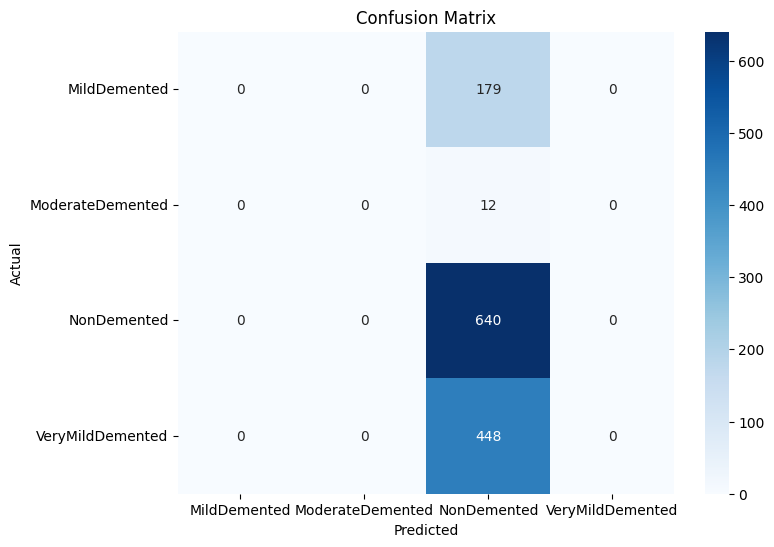

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Classification report
print("Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict
pred_probs = model.predict(test_generator)
y_pred = pred_probs.argmax(axis=1)
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

Found 1279 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


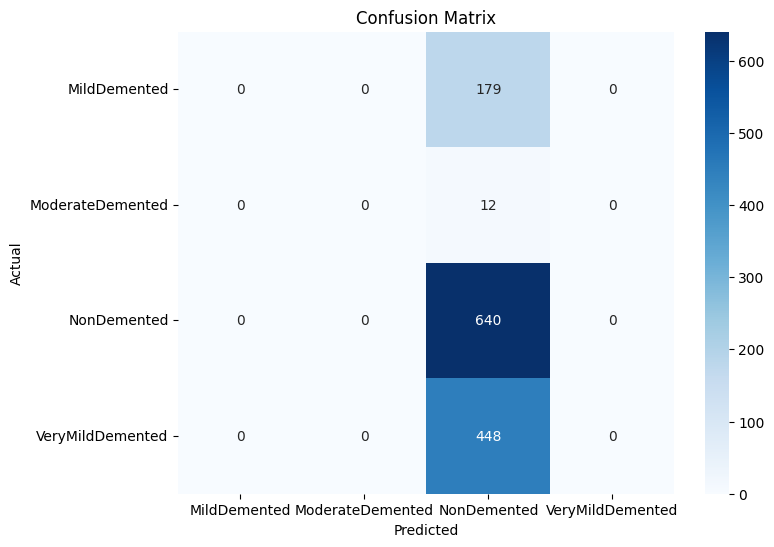

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

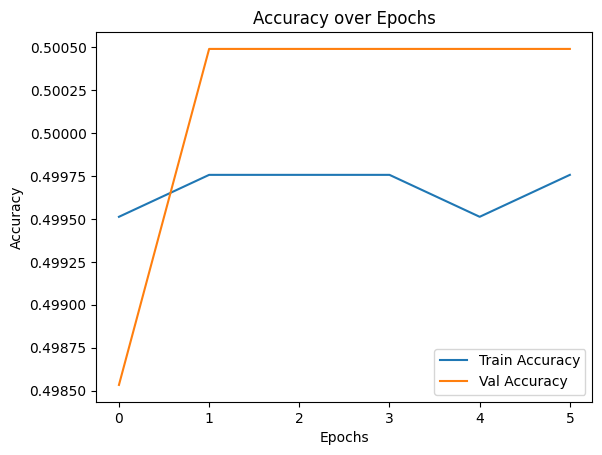

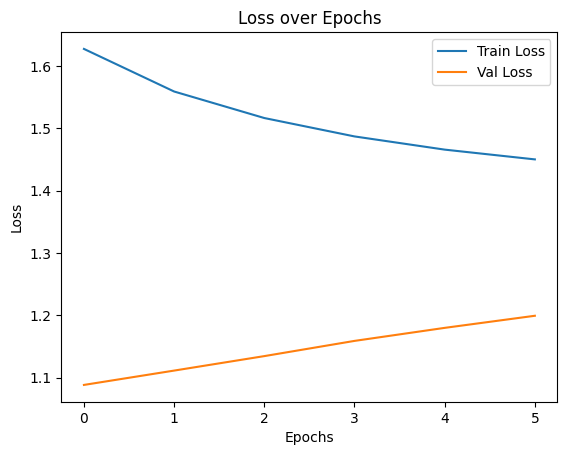

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen_aug.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=25,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 73s 411ms/step - accuracy: 0.2283 - loss: 18.9335 - val_accuracy: 0.5004 - val_loss: 5.9063
Epoch 2/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 61s 381ms/step - accuracy: 0.4497 - loss: 1.3974 - val_accuracy: 0.1345 - val_loss: 1.3942
Epoch 3/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 383ms/step - accuracy: 0.1402 - loss: 1.3673 - val_accuracy: 0.1400 - val_loss: 1.3844
Epoch 4/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 60s 370ms/step - accuracy: 0.1401 - loss: 1.4291 - val_accuracy: 0.1400 - val_loss: 1.3846
Epoch 5/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 383ms/step - accuracy: 0.1481 - loss: 1.2841 - val_accuracy: 0.1400 - val_loss: 1.3842
Epoch 6/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 385ms/step - accuracy: 0.4065 - loss: 1.3520 - val_accuracy: 0.5004 - val_loss: 1.3841
Epoch 7/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 60s 373ms/step - accuracy: 0.4188 - loss: 1.3883 - val_accuracy: 0.3503 - val_loss: 1.3828
Epoch 8/25
161/161 ━━━━━━━━━━━━━━━━━━━━ 63s 389ms/step - accuracy: 0.3546 - loss: 

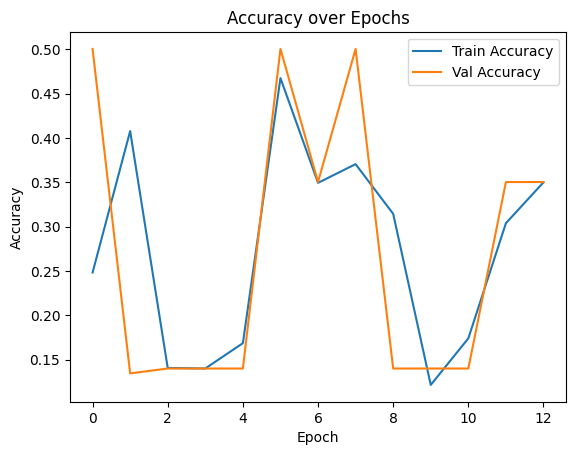

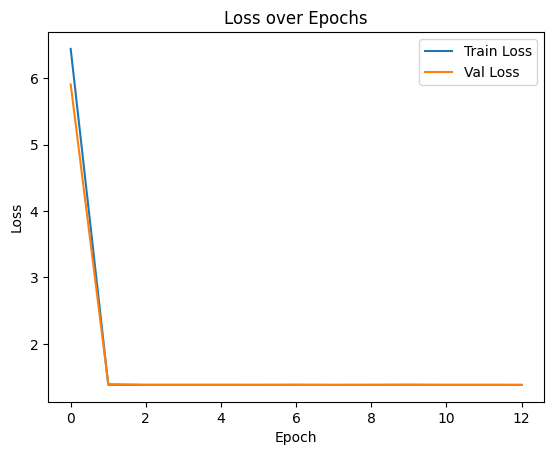

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5026 - loss: 1.3845
Test Accuracy: 0.5004
Test Loss: 1.3828


In [ ]:
model.save("/content/drive/MyDrive/alz_model.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/drive/MyDrive/alz_model.keras")
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
# Reuse your test generator if needed
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/alz/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Found 1279 images belonging to 4 classes.
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.5026 - loss: 1.3845
Test Accuracy: 0.5004
Test Loss: 1.3828


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,  # Reduce from 25 to 5 for faster training
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop],
    steps_per_epoch=20,         # Train on a smaller subset
    validation_steps=10         # Validate on a smaller subset
)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 555ms/step - accuracy: 0.4997 - loss: 1.5851 - val_accuracy: 0.4938 - val_loss: 1.3849
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.3314 - loss: 1.3015 - val_accuracy: 0.3438 - val_loss: 1.3849
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.3111 - loss: 1.3017 - val_accuracy: 0.5125 - val_loss: 1.3857


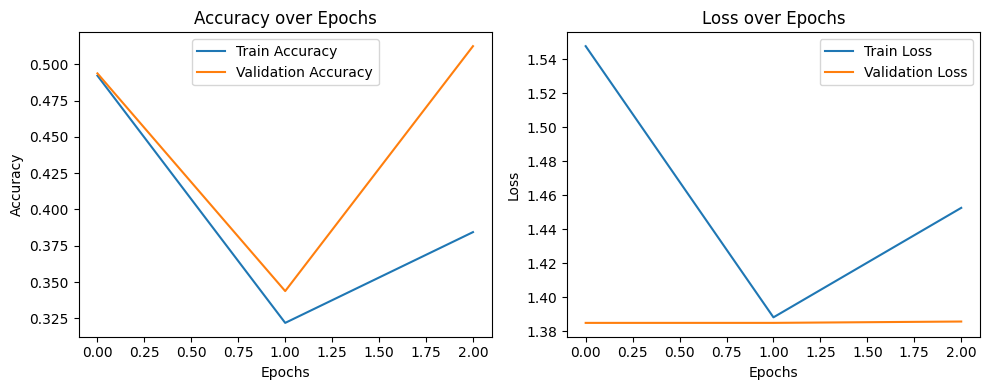

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step


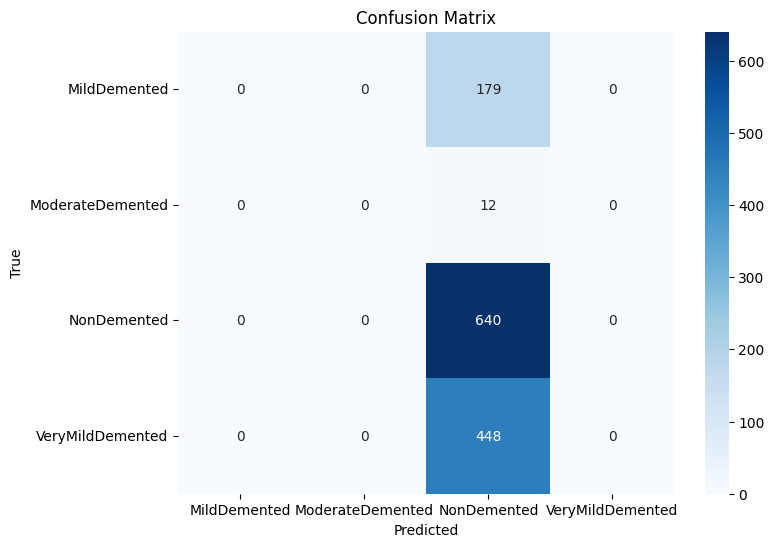

Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
pred_probs = model.predict(test_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

In [ ]:
model.save("/content/drive/MyDrive/alz_model.keras")

NameError: name 'model' is not defined

Day 14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/alz.zip"
extract_path = "/content/alz"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/alz/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/alz_model.keras")

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5026 - loss: 1.3870
Test Accuracy: 0.5004
Test Loss: 1.3848


In [ ]:
import numpy as np

# Predict class probabilities
pred_probs = model.predict(test_generator)
# Convert probabilities to class predictions
y_pred = np.argmax(pred_probs, axis=1)
y_true = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen_aug.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "/content/alz/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

Class Weights: {0: np.float64(1.7855648535564854), 1: np.float64(24.620192307692307), 2: np.float64(0.50009765625), 3: np.float64(0.7144252232142857)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=5,  # Just enough to get history for plots
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

import json

# Save training history
with open('/content/drive/MyDrive/alz_history.json', 'w') as f:
    json.dump(history.history, f)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 70s 396ms/step - accuracy: 0.1620 - loss: 1.4144 - val_accuracy: 0.3503 - val_loss: 1.3837
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 386ms/step - accuracy: 0.2454 - loss: 1.4255 - val_accuracy: 0.0094 - val_loss: 1.3858
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 63s 394ms/step - accuracy: 0.1995 - loss: 1.3970 - val_accuracy: 0.5004 - val_loss: 1.3852


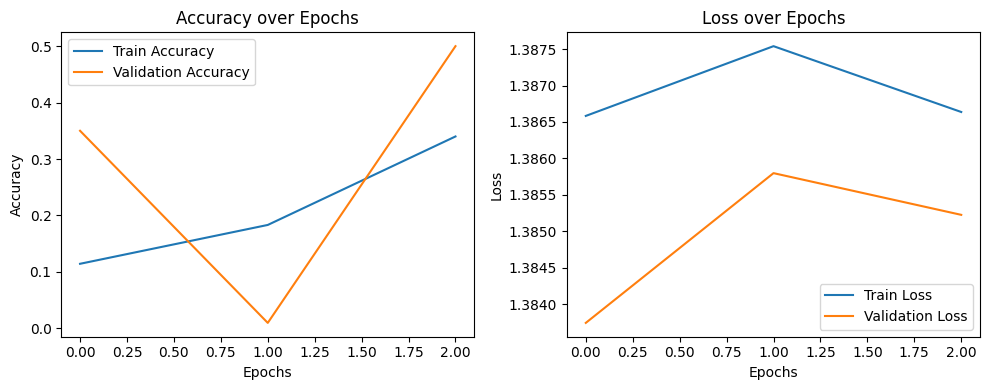

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


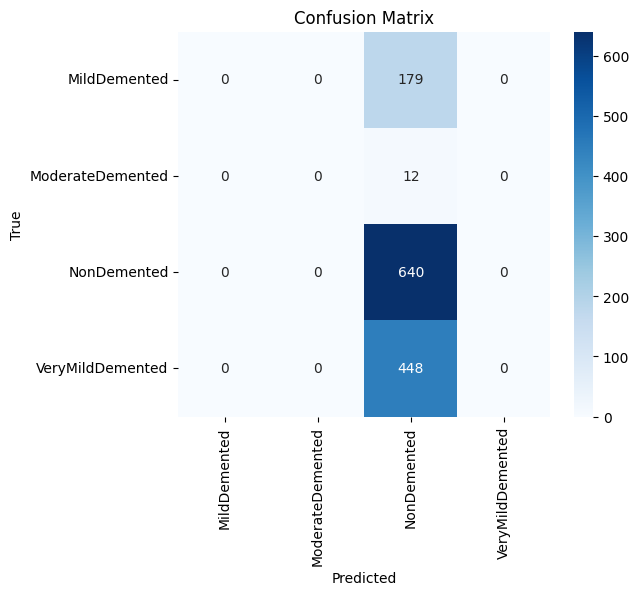

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/alz_model.keras")

In [ ]:
# Predict class probabilities
pred_probs = model.predict(test_generator)
y_pred = pred_probs.argmax(axis=1)
y_true = test_generator.classes

# Get class labels
class_labels = list(test_generator.class_indices.keys())

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


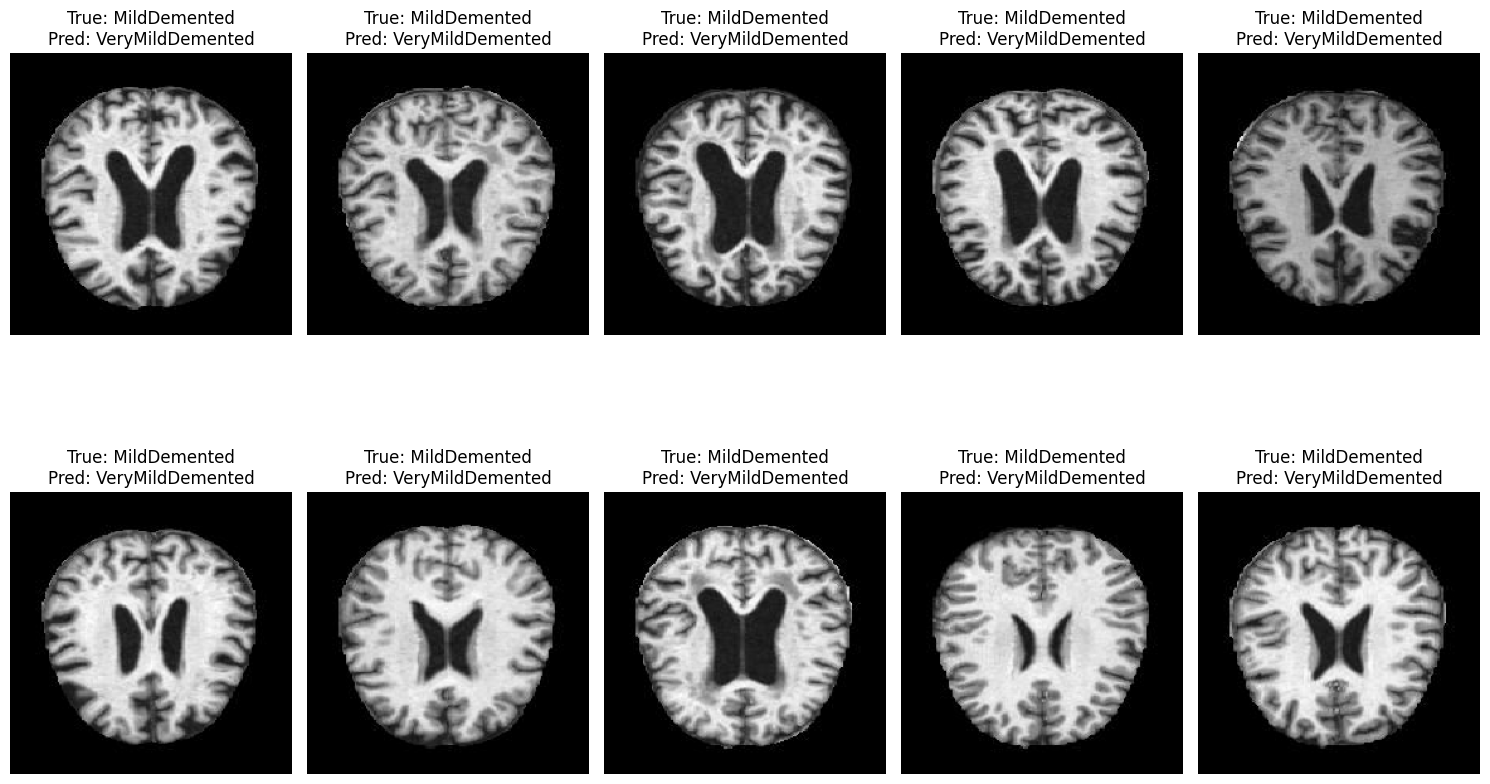

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Find misclassified indices
misclassified_indices = np.where(y_pred != y_true)[0]

# Display 10 misclassified examples
plt.figure(figsize=(15, 10))
for i, idx in enumerate(misclassified_indices[:10]):
    image, label = test_generator[idx]
    plt.subplot(2, 5, i + 1)
    plt.imshow(image[0])
    plt.title(f"True: {class_labels[y_true[idx]]}\nPred: {class_labels[y_pred[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def get_gradcam_heatmap(model, img_array, class_index, layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
import tensorflow as tf
# Call the model once to build its layers
_ = model.predict(np.expand_dims(test_generator[0][0][0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the model
model = load_model("/content/drive/MyDrive/alz_model.keras")

_ = model.predict(np.expand_dims(np.zeros((224, 224, 3)), axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 803ms/step


In [ ]:
import numpy as np

# Simulate a dummy prediction to build the model
dummy_input = np.random.rand(1, 224, 224, 3)
_ = model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [ ]:
from tensorflow.keras.preprocessing import image

img_path = "/content/alz/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_array, axis=0)

In [ ]:
pred = model.predict(img_tensor)
pred_class = np.argmax(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


In [ ]:
for i, layer in enumerate(model.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

0: conv2d_3 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1: batch_normalization_3 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
2: max_pooling2d_3 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
3: conv2d_4 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4: batch_normalization_4 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
5: max_pooling2d_4 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
6: conv2d_5 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
7: batch_normalization_5 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
8: max_pooling2d_5 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
9: dropout_1 - <class 'keras.src.layers.regularization.dropout.Dropout'>
10: flatten_1 - <class 'keras.src.layers.reshaping.flatten.Flatten'>
11: dense_2 - <class 'keras.src.layers.core.dense.Dense'>
12: dropout_2 - <class 

In [ ]:
img_path = "/content/alz/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/alz_model.keras")
_ = model.predict(test_generator[0][0])  # initializes model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_array, axis=0)

pred = model.predict(img_tensor)
pred_class = np.argmax(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

def show_gradcam(img_path, model, class_index, layer_name):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    # Call the model once to initialize the input shape:
    _ = model.predict(np.zeros((1, 224, 224, 3)))  # Dummy input with correct shape
    # _ = model.predict(img_tensor) # Call the model with a valid image to initialize the layers properly.

    grad_model = tf.keras.models.Model(
        inputs=model.input,
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    # Load original image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    # Create color map
    heatmap = cv2.resize(heatmap.numpy(), (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [ ]:
show_gradcam(img_path, model, pred_class, layer_name='conv2d_5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
import numpy as np

# Assuming this is already defined:
img_path = "/content/alz/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"
pred = model.predict(np.expand_dims(test_generator[0][0][0], axis=0))
pred_class = np.argmax(pred[0])

# Then show Grad-CAM
show_gradcam(img_path, model, pred_class, layer_name='conv2d_5')


InvalidArgumentError: Graph execution error:

Detected at node convolution defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-97-ad30b0bec77b>", line 5, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py", line 243, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py", line 233, in convolution_op

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1305, in conv

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 329, in conv

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 317, in _conv_xla

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 304, in _conv

Depth of output must be a multiple of the number of groups: 32 vs 3

Stack trace for op definition: 
File "<frozen runpy>", line 198, in _run_module_as_main
File "<frozen runpy>", line 88, in _run_code
File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start
File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever
File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once
File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request
File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute
File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
File "<ipython-input-97-ad30b0bec77b>", line 5, in <cell line: 0>
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 562, in predict
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 259, in one_step_on_data_distributed
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 249, in one_step_on_data
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 104, in predict_step
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/sequential.py", line 213, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 182, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/function.py", line 171, in _run_through_graph
File "/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py", line 637, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py", line 908, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/operation.py", line 46, in __call__
File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py", line 243, in call
File "/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py", line 233, in convolution_op
File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1305, in conv
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 329, in conv
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 317, in _conv_xla
File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 304, in _conv

	 [[{{node convolution}}]]
	tf2xla conversion failed while converting __inference_one_step_on_data_219396[]. Run with TF_DUMP_GRAPH_PREFIX=/path/to/dump/dir and --vmodule=xla_compiler=2 to obtain a dump of the compiled functions.
	 [[StatefulPartitionedCall]] [Op:__inference_one_step_on_data_distributed_219415]

In [ ]:
import json
with open('/content/drive/MyDrive/alz_history.json', 'r') as f:
  history_data = json.load(f)

final fix

In [ ]:
from tensorflow.keras.models import load_model
model_seq = load_model("/content/drive/MyDrive/alz_model.keras")

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input

# Create a new functional model from the sequential model
input_tensor = Input(shape=(224, 224, 3))
output_tensor = model_seq(input_tensor)
model = Model(inputs=input_tensor, outputs=output_tensor)

In [ ]:
import numpy as np
_ = model.predict(np.random.rand(1, 224, 224, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


In [ ]:
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Load your Sequential model
model_seq = load_model("/content/drive/MyDrive/alz_model.keras")

# Wrap it with Functional API
input_tensor = Input(shape=(224, 224, 3))
output_tensor = model_seq(input_tensor)
model = Model(inputs=input_tensor, outputs=output_tensor)

# Now you can use:
print(model.input)    # should print a tensor
print(model.output)   # should print a tensor

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_777>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_778>


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input

# Load your saved Sequential model
inner_model = load_model("/content/drive/MyDrive/alz_model.keras")

# Force the Sequential model to build its internal graph
_ = inner_model(tf.zeros((1, 224, 224, 3)))  # "Call" the model once

# Wrap in Functional model so we can access input/output for Grad-CAM
input_tensor = Input(shape=(224, 224, 3))
output_tensor = inner_model(input_tensor)
model = Model(inputs=input_tensor, outputs=output_tensor)

# Optional: see all layer names for Grad-CAM
for i, layer in enumerate(inner_model.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

ValueError: File not found: filepath=/content/drive/MyDrive/alz_model.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# === Load your model and extract inner model ===
model_seq = load_model("/content/drive/MyDrive/alz_model.keras")
inner_model = model_seq  # This is the Sequential model

# Wrap the model to make sure model.input/output is accessible
input_tensor = Input(shape=(224, 224, 3))
output_tensor = inner_model(input_tensor)
model = Model(inputs=input_tensor, outputs=output_tensor)

# === List layers if needed
for i, layer in enumerate(inner_model.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

# === Function to Show Grad-CAM ===
def show_gradcam(img_path, model, class_index, inner_model, layer_name='conv2d_5'):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    grad_model = Model(
        inputs=model.input,
        outputs=[inner_model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    # Load original image
    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_color, 0.4, 0)

    # Display
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# === Example usage ===
img_path = "/content/alz/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"

# Predict to get class
img_for_pred = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img_for_pred) / 255.0
pred = model.predict(np.expand_dims(img_array, axis=0))
pred_class = np.argmax(pred[0])

# Show Grad-CAM using inner model and correct layer
show_gradcam(img_path, model, pred_class, inner_model, layer_name='conv2d_5')


0: conv2d_3 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1: batch_normalization_3 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
2: max_pooling2d_3 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
3: conv2d_4 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4: batch_normalization_4 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
5: max_pooling2d_4 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
6: conv2d_5 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
7: batch_normalization_5 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
8: max_pooling2d_5 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
9: dropout_1 - <class 'keras.src.layers.regularization.dropout.Dropout'>
10: flatten_1 - <class 'keras.src.layers.reshaping.flatten.Flatten'>
11: dense_2 - <class 'keras.src.layers.core.dense.Dense'>
12: dropout_2 - <class 

KeyError: 'Exception encountered when calling Functional.call().\n\n\x1b[1m136457188979600\x1b[0m\n\nArguments received by Functional.call():\n  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)\n  • training=None\n  • mask=None'

day 15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.models import load_model
import os

model_path = "/content/drive/MyDrive/alz_model.keras"

# Confirm model file exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at: {model_path}. Please check the filename and path.")

model = load_model(model_path)
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
import json

history_path = "/content/drive/MyDrive/alz_history.json"

# Confirm history file exists
if not os.path.exists(history_path):
    raise FileNotFoundError(f"History file not found at: {history_path}. Please check the filename and path.")

with open(history_path, "r") as f:
    history = json.load(f)

print("Training history loaded successfully.")

Training history loaded successfully.


In [ ]:
import tensorflow as tf
import numpy as np

# Dummy image shaped like your training data
dummy_input = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Run a warm-up forward pass to initialize model
_ = model.predict(dummy_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [ ]:
from tensorflow.keras.models import load_model,Model
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input

# Load your saved model
model_seq = load_model("/content/drive/MyDrive/alz_model.keras")

input_tensor = Input(shape=(224, 224, 3))
output_tensor = model_seq(input_tensor)
model = Model(inputs=input_tensor, outputs=output_tensor)

# Confirm inputs/outputs are now accessible
print("Model Input:", model.input)
print("Model Output:", model.output)

Model Input: <KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=keras_tensor_315>
Model Output: <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_316>


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


In [ ]:
img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_tensor = tf.expand_dims(img_array, axis=0)

pred = model.predict(img_tensor)
pred_class = tf.argmax(pred[0]).numpy()

print("Predicted class index:", pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class index: 3


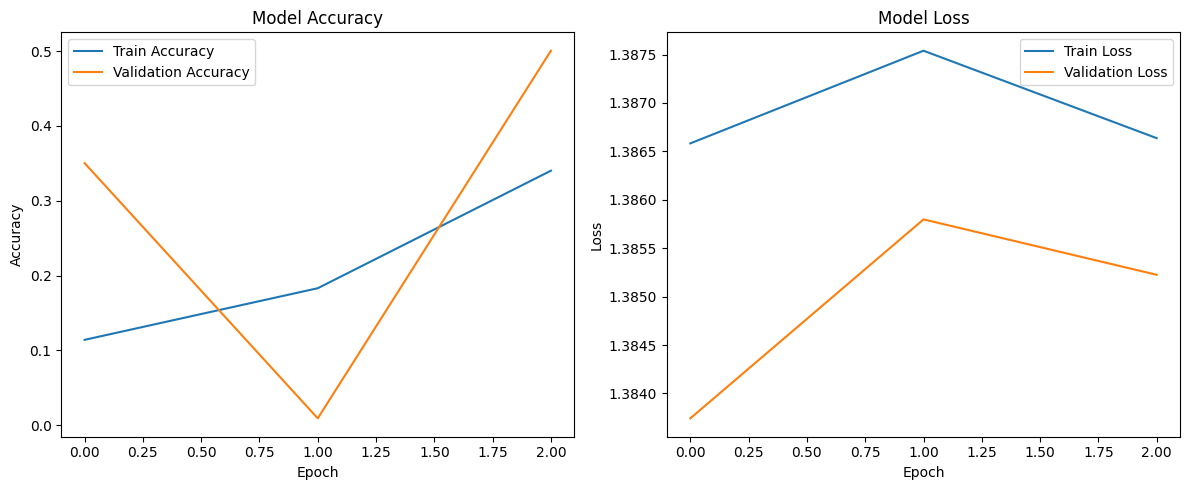

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"

# Predict class
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_array, axis=0)
pred = model.predict(img_tensor)
pred_class = np.argmax(pred[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


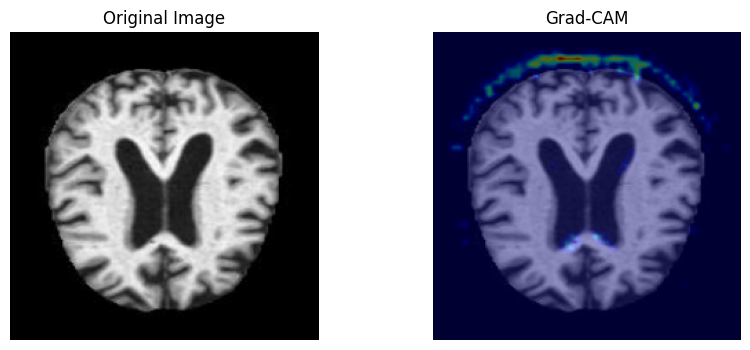

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import clone_model

# === Load original model
model_seq = load_model("/content/drive/MyDrive/alz_model.keras")

# === Rebuild a functional version with cloned layers
input_tensor = Input(shape=(224, 224, 3))
x = input_tensor
for layer in model_seq.layers:
    x = layer.__class__.from_config(layer.get_config())(x)
model_func = Model(inputs=input_tensor, outputs=x)

# === Get last conv layer (make sure it's correct!)
last_conv_layer_name = 'conv2d_5'
last_conv_layer = model_func.get_layer(last_conv_layer_name)

# === Create grad_model that outputs conv layer + final prediction
grad_model = Model(inputs=model_func.input,
                   outputs=[last_conv_layer.output, model_func.output])

# === Grad-CAM Function
def show_gradcam(img_path, grad_model, class_index):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)

    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# === Predict + Run Grad-CAM
img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
preds = model_func.predict(np.expand_dims(img_array, axis=0))
pred_class = np.argmax(preds[0])

# 🔥 Show Grad-CAM
show_gradcam(img_path, grad_model, pred_class)

day 16

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
# Assuming you have test_generator already defined

# Compile the model before evaluation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Now evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.0814 - loss: 1.3871
Test Accuracy: 0.3503


In [ ]:
# Assuming you have test_generator already defined
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.0814 - loss: 1.3871
Test Accuracy: 0.3503


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)

# True labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step


In [ ]:
report = classification_report(true_classes, pred_classes, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
                   precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.00      0.00      0.00       640
VeryMildDemented       0.35      1.00      0.52       448

        accuracy                           0.35      1279
       macro avg       0.09      0.25      0.13      1279
    weighted avg       0.12      0.35      0.18      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


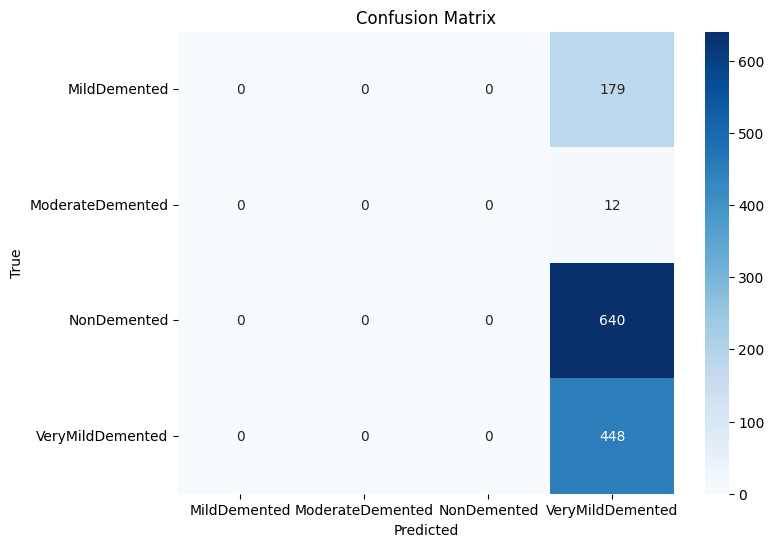

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/alz_model.keras")

day 17

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load model (update filename if different)
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/alz_model.keras"
model = load_model(model_path)

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    "/content/alzt_data/Alzheimer_s Dataset/test",  # Update path if needed
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1279 images belonging to 4 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"✅ Test Accuracy: {test_acc:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.0814 - loss: 1.3871
✅ Test Accuracy: 0.3503
✅ Test Loss: 1.3837


40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step
📝 Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.00      0.00      0.00       640
VeryMildDemented       0.35      1.00      0.52       448

        accuracy                           0.35      1279
       macro avg       0.09      0.25      0.13      1279
    weighted avg       0.12      0.35      0.18      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


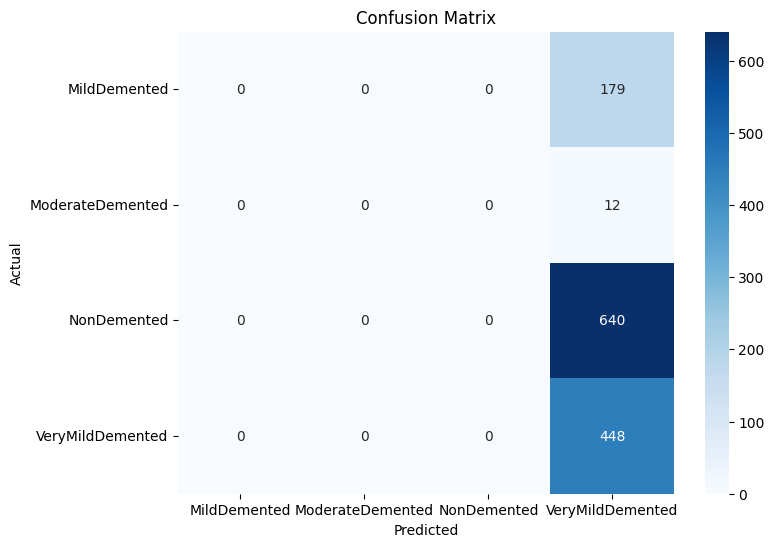

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Report
print("📝 Classification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input

# === Load saved model
model_seq = tf.keras.models.load_model("/content/drive/MyDrive/alz_model.keras")
inner_seq = model_seq.get_layer("sequential_1")

for i, layer in enumerate(inner_seq.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

0: conv2d_3 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1: batch_normalization_3 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
2: max_pooling2d_3 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
3: conv2d_4 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4: batch_normalization_4 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
5: max_pooling2d_4 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
6: conv2d_5 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
7: batch_normalization_5 - <class 'keras.src.layers.normalization.batch_normalization.BatchNormalization'>
8: max_pooling2d_5 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
9: dropout_1 - <class 'keras.src.layers.regularization.dropout.Dropout'>
10: flatten_1 - <class 'keras.src.layers.reshaping.flatten.Flatten'>
11: dense_2 - <class 'keras.src.layers.core.dense.Dense'>
12: dropout_2 - <class 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


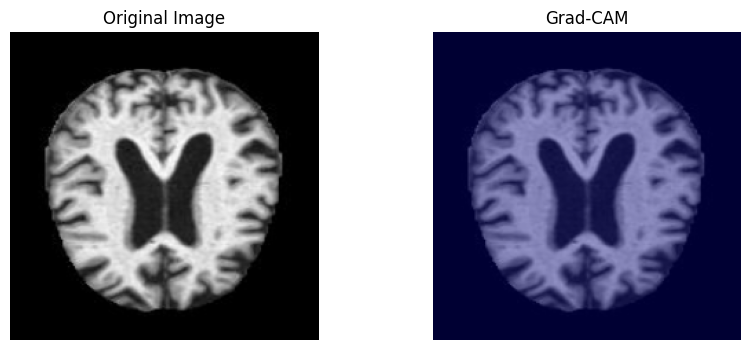

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Reconstruct a Functional model to get both conv2d_5 output and final prediction
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Step 1: Input
input_tensor = Input(shape=(224, 224, 3))

# Step 2: Pass through inner_seq layer by layer
x = input_tensor
conv_output = None
for layer in inner_seq.layers:
    x = layer(x)
    if layer.name == "conv2d_5":
        conv_output = x  # Save output of target conv layer

# Step 3: Final output (x is already the final prediction from inner_seq)
final_output = x

# Step 4: Build model
grad_model = Model(inputs=input_tensor, outputs=[conv_output, final_output])

# Warm-up
_ = grad_model(tf.random.normal((1, 224, 224, 3)))



# === Grad-CAM function
def show_gradcam(img_path, grad_model, class_index):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)

    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
preds = model_seq.predict(np.expand_dims(img_array, axis=0))
pred_class = np.argmax(preds[0])

show_gradcam(img_path, grad_model, pred_class)

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=1e-5),  # small LR!
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen_aug.flow_from_directory(
    "/content/alzt_data/Alzheimer_s Dataset/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    "/content/alzt_data/Alzheimer_s Dataset/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1217s 7s/step - accuracy: 0.3465 - loss: 1.3835 - val_accuracy: 0.3503 - val_loss: 1.3827 - learning_rate: 1.0000e-05
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1205s 8s/step - accuracy: 0.3420 - loss: 1.3826 - val_accuracy: 0.3503 - val_loss: 1.3817 - learning_rate: 1.0000e-05
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1171s 7s/step - accuracy: 0.3435 - loss: 1.3816 - val_accuracy: 0.3503 - val_loss: 1.3807 - learning_rate: 1.0000e-05
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1166s 7s/step - accuracy: 0.3571 - loss: 1.3805 - val_accuracy: 0.3503 - val_loss: 1.3797 - learning_rate: 1.0000e-05
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1119s 7s/step - accuracy: 0.3393 - loss: 1.3795 - val_accuracy: 0.3503 - val_loss: 1.3787 - learning_rate: 1.0000e-05
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1150s 7s/step - accuracy: 0.3515 - loss: 1.3785 - val_accuracy: 0.3503 - val_loss: 1.3777 - learning_rate: 1.0000e-05
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1114s 7s/ste

KeyboardInterrupt: 

In [ ]:
model.save('/content/drive/MyDrive/alz_model_checkpoint_epoch10.keras')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/alz_model_checkpoint_epoch13.keras')

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # continues from last
    initial_epoch=10,  # important!
    callbacks=callbacks
)

Epoch 11/15


KeyboardInterrupt: 

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,  # This continues from epoch 13 up to 20
    initial_epoch=13,  # IMPORTANT: start from epoch 14
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            '/content/drive/MyDrive/alz_model_checkpoint_epoch{epoch:02d}.keras',
            save_best_only=False,
            save_freq='epoch'
        )
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 14/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1034s 6s/step - accuracy: 0.5090 - loss: 1.3698 - val_accuracy: 0.5004 - val_loss: 1.3693
Epoch 15/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1042s 6s/step - accuracy: 0.4924 - loss: 1.3699 - val_accuracy: 0.5004 - val_loss: 1.3684
Epoch 16/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1058s 7s/step - accuracy: 0.5140 - loss: 1.3676 - val_accuracy: 0.5004 - val_loss: 1.3674
Epoch 17/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1115s 7s/step - accuracy: 0.4951 - loss: 1.3673 - val_accuracy: 0.5004 - val_loss: 1.3664
Epoch 18/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1063s 7s/step - accuracy: 0.5014 - loss: 1.3665 - val_accuracy: 0.5004 - val_loss: 1.3654
Epoch 19/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1074s 7s/step - accuracy: 0.4928 - loss: 1.3653 - val_accuracy: 0.5004 - val_loss: 1.3645
Epoch 20/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1026s 6s/step - accuracy: 0.5005 - loss: 1.3648 - val_accuracy: 0.5004 - val_loss: 1.3635


In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.5026 - loss: 1.3805
Test Accuracy: 0.5004, Test Loss: 1.3635


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Class names
class_labels = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred_classes, target_names=class_labels))

40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step
                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


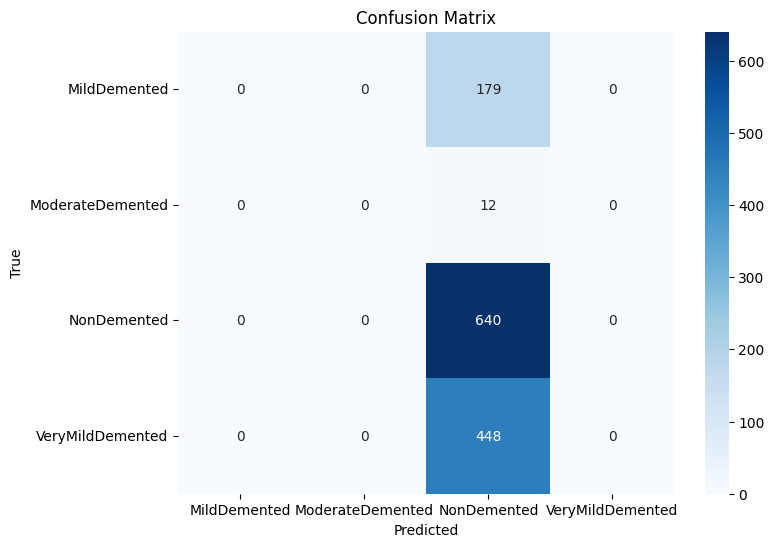

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

    MildDemented       0.00      0.00      0.00       179
ModerateDemented       0.00      0.00      0.00        12
     NonDemented       0.50      1.00      0.67       640
VeryMildDemented       0.00      0.00      0.00       448

        accuracy                           0.50      1279
       macro avg       0.13      0.25      0.17      1279
    weighted avg       0.25      0.50      0.33      1279



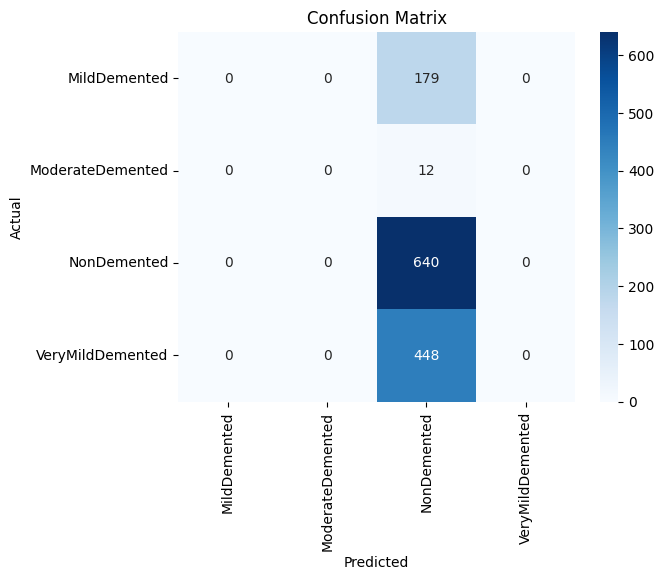

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict classes
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes

# Classification report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def show_gradcam(img_path, grad_model, class_index):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)

    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the model
model = tf.keras.models.load_model("/content/drive/MyDrive/alz_model_checkpoint_epoch13.keras")

# Extract the inner Sequential model
inner_seq = model.get_layer("sequential_1")

# Confirm layers
for i, layer in enumerate(inner_seq.layers):
    print(f"{i}: {layer.name}")


0: conv2d_3
1: batch_normalization_3
2: max_pooling2d_3
3: conv2d_4
4: batch_normalization_4
5: max_pooling2d_4
6: conv2d_5
7: batch_normalization_5
8: max_pooling2d_5
9: dropout_1
10: flatten_1
11: dense_2
12: dropout_2
13: dense_3


In [ ]:
last_conv_layer_name = "conv2d_5"  # Replace with actual name from print if different

In [ ]:
# Step 4: Pick the last conv layer
last_conv_layer_name = "conv2d_5"  # Confirm from output above
last_conv_layer = inner_seq.get_layer(last_conv_layer_name)

# Step 5: Create dummy functional wrapper
inputs = tf.keras.Input(shape=(224, 224, 3))
x = inputs
for layer in inner_seq.layers:
    x = layer(x)
    if layer.name == last_conv_layer_name:
        conv_output = x  # Save conv output
outputs = x  # Final output

# Grad-CAM model
grad_model = tf.keras.models.Model(inputs=inputs, outputs=[conv_output, outputs])

In [ ]:
# Get one image from validation data
x_batch, y_batch = next(val_generator)

# Ensure it's the right shape (1, 224, 224, 3)
img_input = tf.convert_to_tensor(x_batch[0:1])

# Forward pass to cache outputs (no KeyError now)
conv_output, prediction = grad_model(img_input)

print("🎉 Grad-CAM forward pass successful!")

🎉 Grad-CAM forward pass successful!


In [ ]:
def get_img_array(img_path, size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0
    return array

def make_gradcam_heatmap(img_array, model, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

def show_gradcam(img_path, model, pred_class):
    img_array = get_img_array(img_path)
    heatmap = make_gradcam_heatmap(img_array, model, pred_class)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)

    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed = heatmap * 0.4 + img
    plt.imshow(cv2.cvtColor(superimposed.astype(np.uint8), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Grad-CAM")
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


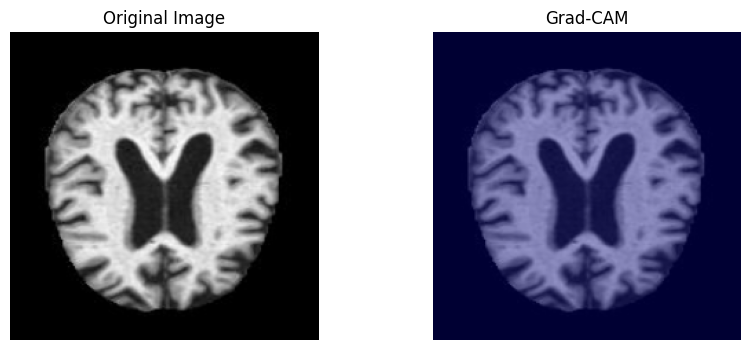

In [ ]:
img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"

# Predict class
img_array = get_img_array(img_path)
preds = inner_seq.predict(img_array)
pred_class = np.argmax(preds[0])

# Show Grad-CAM
show_gradcam(img_path,grad_model, pred_class)

In [ ]:
model.save('/content/drive/MyDrive/alz_model_checkpoint_epoch20.keras')

Day 21

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load model (update filename if different)
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/alz_model_checkpoint_epoch20.keras"
model = load_model(model_path)

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmented generator for training data
augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation should NOT be augmented
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = augmented_train_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
# You can use the same model as before or redefine it if needed
history_augmented = model.fit(
    train_generator,
    epochs=5,
    validation_data=valid_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 424ms/step - accuracy: 0.4972 - loss: 1.3699 - val_accuracy: 0.5004 - val_loss: 1.3694
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 66s 412ms/step - accuracy: 0.5011 - loss: 1.3692 - val_accuracy: 0.5004 - val_loss: 1.3684
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 68s 423ms/step - accuracy: 0.4940 - loss: 1.3683 - val_accuracy: 0.5004 - val_loss: 1.3674
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 70s 437ms/step - accuracy: 0.5043 - loss: 1.3671 - val_accuracy: 0.5004 - val_loss: 1.3664
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 69s 428ms/step - accuracy: 0.5046 - loss: 1.3662 - val_accuracy: 0.5004 - val_loss: 1.3655


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = augmented_train_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


In [ ]:
history_augmented = model.fit(
    train_generator,
    epochs=10,  # You can increase to 15 or 20 if needed
    validation_data=valid_generator
)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 71s 438ms/step - accuracy: 0.5064 - loss: 1.3655 - val_accuracy: 0.5004 - val_loss: 1.3645
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 84s 449ms/step - accuracy: 0.5049 - loss: 1.3642 - val_accuracy: 0.5004 - val_loss: 1.3635
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 467ms/step - accuracy: 0.5096 - loss: 1.3636 - val_accuracy: 0.5004 - val_loss: 1.3626
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 73s 453ms/step - accuracy: 0.5056 - loss: 1.3623 - val_accuracy: 0.5004 - val_loss: 1.3616
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 73s 453ms/step - accuracy: 0.5086 - loss: 1.3615 - val_accuracy: 0.5004 - val_loss: 1.3606
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 72s 449ms/step - accuracy: 0.5047 - loss: 1.3606 - val_accuracy: 0.5004 - val_loss: 1.3597
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 75s 464ms/step - accuracy: 0.4873 - loss: 1.3596 - val_accuracy: 0.5004 - val_loss: 1.3587
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 83s 518ms/step - accuracy: 0.4938 - loss: 1

In [ ]:
model.save('/content/drive/MyDrive/alz_model_checkpoint_epoch20.keras')

In [ ]:
import os
from collections import Counter

train_dir ='/content/alzt_data/Alzheimer_s Dataset/train'

for subdir in os.listdir(train_dir):
    count = len(os.listdir(os.path.join(train_dir, subdir)))
    print(f"{subdir}: {count}")

ModerateDemented: 52
VeryMildDemented: 1792
MildDemented: 717
NonDemented: 2560


In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Labels of all training images (you'll need to extract this from the generator)
labels = train_generator.classes

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: np.float64(1.7855648535564854), 1: np.float64(24.620192307692307), 2: np.float64(0.50009765625), 3: np.float64(0.7144252232142857)}


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 1279 images belonging to 4 classes.


In [ ]:
model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights_dict,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 74s 418ms/step - accuracy: 0.4928 - loss: 1.4472 - val_accuracy: 0.5004 - val_loss: 1.3559 - learning_rate: 1.0000e-05
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 69s 431ms/step - accuracy: 0.5016 - loss: 1.4394 - val_accuracy: 0.5004 - val_loss: 1.3559 - learning_rate: 1.0000e-05
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 69s 424ms/step - accuracy: 0.5051 - loss: 1.4494 - val_accuracy: 0.5004 - val_loss: 1.3560 - learning_rate: 1.0000e-05
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 82s 423ms/step - accuracy: 0.4941 - loss: 1.4417 - val_accuracy: 0.5004 - val_loss: 1.3560 - learning_rate: 2.0000e-06
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 67s 419ms/step - accuracy: 0.5023 - loss: 1.4263 - val_accuracy: 0.5004 - val_loss: 1.3560 - learning_rate: 2.0000e-06
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 67s 418ms/step - accuracy: 0.4991 - loss: 1.3401 - val_accuracy: 0.5004 - val_loss: 1.3560 - learning_rate: 4.0000e-07


Improving accuracy by adding MobileNetV2

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_counts = {
    'ModerateDemented': 52,
    'MildDemented': 717,
    'VeryMildDemented': 1792,
    'NonDemented': 2560
}

classes = list(train_generator.class_indices.keys())
labels = np.array([class_counts[class_name] for class_name in classes])
class_weights = compute_class_weight('balanced', classes=np.arange(len(classes)), y=np.repeat(np.arange(len(classes)), labels))
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False  # Freeze base

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

<ipython-input-16-b9353d8f9579>:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_107']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


161/161 ━━━━━━━━━━━━━━━━━━━━ 85s 457ms/step - accuracy: 0.2633 - loss: 1.7180 - val_accuracy: 0.3425 - val_loss: 1.3687 - learning_rate: 0.0010
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 386ms/step - accuracy: 0.3343 - loss: 1.4427 - val_accuracy: 0.5426 - val_loss: 0.9607 - learning_rate: 0.0010
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 63s 390ms/step - accuracy: 0.4418 - loss: 1.2217 - val_accuracy: 0.5020 - val_loss: 1.1480 - learning_rate: 0.0010
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 65s 401ms/step - accuracy: 0.4401 - loss: 1.1675 - val_accuracy: 0.5285 - val_loss: 1.0840 - learning_rate: 0.0010
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 62s 388ms/step - accuracy: 0.4602 - loss: 1.0671 - val_accuracy: 0.5512 - val_loss: 0.9899 - learning_rate: 2.0000e-04
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 61s 379ms/step - accuracy: 0.4542 - loss: 1.1701 - val_accuracy: 0.5598 - val_loss: 0.9994 - learning_rate: 2.0000e-04
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 63s 390ms/step - accuracy: 0.4900

In [ ]:
model.save('/content/drive/MyDrive/alz_model_checkpoint_epoch20.keras')

In [ ]:
# === Step 1: Data Augmentation and Generators ===
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse')

val_generator = val_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse')

Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


In [ ]:
# === Step 2: Callbacks ===
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
]

In [ ]:
class_weights = {
    0: 1.0,  # ModerateDemented
    1: 1.0,  # MildDemented
    2: 1.0,  # VeryMildDemented
    3: 1.0   # NonDemented
}


In [ ]:
!pip install keras-nlp

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer

class SwiGLU(Layer):
    def __init__(self, **kwargs):
        super(SwiGLU, self).__init__(**kwargs)

    def call(self, inputs):
        # Split inputs along the last dimension
        x1, x2 = tf.split(inputs, num_or_size_splits=2, axis=-1)
        return tf.nn.silu(x1) * x2

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, Input

model = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(64, (3,3), activation=None, kernel_initializer='he_normal'),  # doubled filters
    SwiGLU(),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation=None, kernel_initializer='he_normal'),  # doubled filters
    SwiGLU(),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation=None, kernel_initializer='he_normal'),  # doubled filters
    SwiGLU(),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dropout(0.4),
    Dense(256, activation=None),  # doubled units
    SwiGLU(),
    Dropout(0.4),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ swi_glu (SwiGLU)                │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ swi_glu_1 (SwiGLU)              │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ swi_glu_2 (SwiGLU)              │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ swi_glu_3 (SwiGLU)              │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,932 (863.02 KB)

 Trainable params: 220,484 (861.27 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=callbacks
)


Epoch 1/10


KeyboardInterrupt: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 3327 images belonging to 4 classes.


In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.4f}, Test Loss: {loss:.4f}")

NameError: name 'test_generator' is not defined

Day

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load model (update filename if different)
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/alz_model_checkpoint_epoch20.keras"
model = load_model(model_path)

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


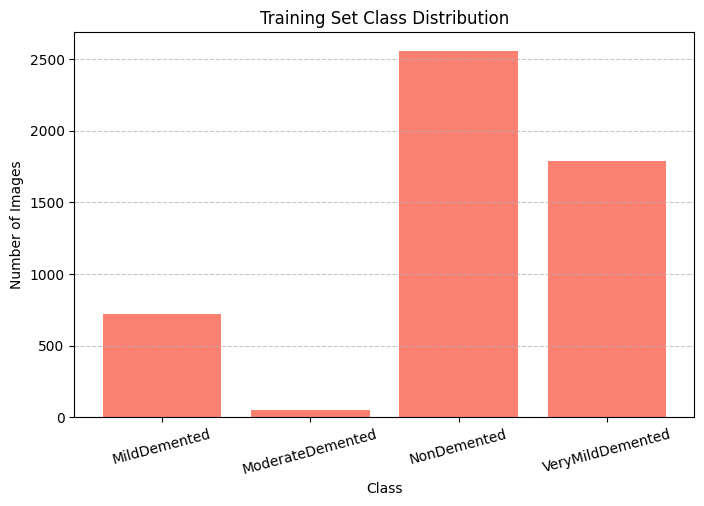

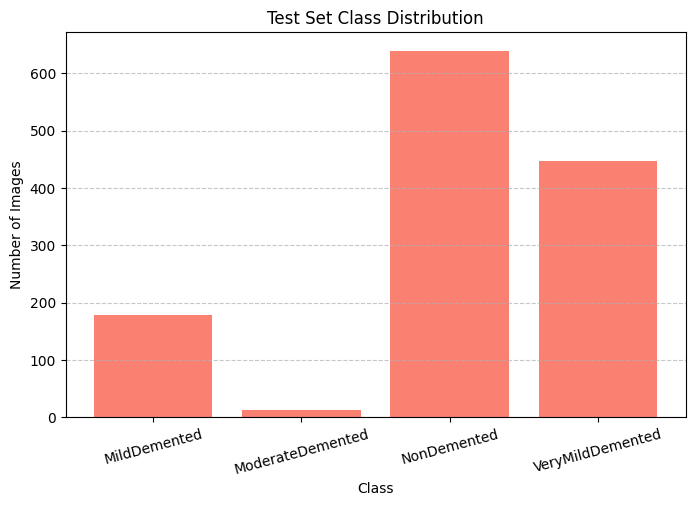

In [ ]:
import os
import matplotlib.pyplot as plt

# Update these paths based on your actual dataset location
train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'
test_dir = '/content/alzt_data/Alzheimer_s Dataset/test'

def plot_class_distribution(directory, title):
    class_counts = {}

    for class_name in sorted(os.listdir(directory)):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len([file for file in os.listdir(class_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))])
            class_counts[class_name] = count

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(class_counts.keys(), class_counts.values(), color='salmon')
    plt.title(title)
    plt.ylabel("Number of Images")
    plt.xlabel("Class")
    plt.xticks(rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot distributions
plot_class_distribution(train_dir, "Training Set Class Distribution")
plot_class_distribution(test_dir, "Test Set Class Distribution")


In [ ]:
!pip install imbalanced-learn

In [ ]:
import os
import shutil
import random
from collections import Counter

# Set your training directory
train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'  # Change path as needed

# Get class distribution
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name)))
                for class_name in os.listdir(train_dir)}

print("Original Class Counts:", class_counts)

# Find the target number of samples (equal to the most common class)
target_count = max(class_counts.values())

# Upsample underrepresented classes
for class_name, count in class_counts.items():
    class_path = os.path.join(train_dir, class_name)
    if count < target_count:
        images = os.listdir(class_path)
        additional_needed = target_count - count
        print(f"Upsampling {class_name} by {additional_needed} images...")

        for i in range(additional_needed):
            img = random.choice(images)
            src = os.path.join(class_path, img)
            dst = os.path.join(class_path, f"augmented_{i}_{img}")
            shutil.copy(src, dst)

# Re-check class counts
new_class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name)))
                    for class_name in os.listdir(train_dir)}
print("Balanced Class Counts:", new_class_counts)


Original Class Counts: {'MildDemented': 717, 'ModerateDemented': 52, 'NonDemented': 2560, 'VeryMildDemented': 1792}
Upsampling MildDemented by 1843 images...
Upsampling ModerateDemented by 2508 images...
Upsampling VeryMildDemented by 768 images...
Balanced Class Counts: {'MildDemented': 2560, 'ModerateDemented': 2560, 'NonDemented': 2560, 'VeryMildDemented': 2560}


In [ ]:
from collections import Counter
import os
import random
import shutil

# Set test dir and new balanced dir
test_dir = '/content/alzt_data/Alzheimer_s Dataset/test'
balanced_test_dir = '/content/alzt_data/Alzheimer_s Dataset/balanced_test'

os.makedirs(balanced_test_dir, exist_ok=True)

# Count images in each class
class_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}
min_samples = min(class_counts.values())

# Create balanced directory
for cls in os.listdir(test_dir):
    class_path = os.path.join(test_dir, cls)
    balanced_class_path = os.path.join(balanced_test_dir, cls)
    os.makedirs(balanced_class_path, exist_ok=True)

    all_images = os.listdir(class_path)
    selected = random.sample(all_images, min_samples)

    for img in selected:
        shutil.copy(os.path.join(class_path, img), os.path.join(balanced_class_path, img))

print("✅ Test set balanced using undersampling.")


✅ Test set balanced using undersampling.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Base paths
base_dir = '/content/alzt_data/Alzheimer_s Dataset'
train_dir = os.path.join(base_dir, 'train')
new_test_dir = os.path.join(base_dir, 'test')

# Create new test directories
os.makedirs(new_test_dir, exist_ok=True)
for class_name in os.listdir(train_dir):
    os.makedirs(os.path.join(new_test_dir, class_name), exist_ok=True)

# Move 10-20% of images per class from train to test
for class_name in os.listdir(train_dir):
    class_train_path = os.path.join(train_dir, class_name)
    images = [f for f in os.listdir(class_train_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for img_name in test_images:
        src_path = os.path.join(class_train_path, img_name)
        dest_path = os.path.join(new_test_dir, class_name, img_name)
        shutil.move(src_path, dest_path)

print("✅ Done moving ~20% images per class from train to test.")


✅ Done moving ~20% images per class from train to test.


In [ ]:
import os
from collections import defaultdict

def count_images_per_class(directory):
    class_counts = defaultdict(int)
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])
            class_counts[class_name] = count
    return class_counts

train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'
test_dir = '/content/alzt_data/Alzheimer_s Dataset/test'

train_counts = count_images_per_class(train_dir)
test_counts = count_images_per_class(test_dir)

print("Train Set Class Distribution:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nTest Set Class Distribution:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")


Train Set Class Distribution:
MildDemented: 2048
ModerateDemented: 2048
NonDemented: 2048
VeryMildDemented: 2048

Test Set Class Distribution:
MildDemented: 691
ModerateDemented: 524
NonDemented: 1152
VeryMildDemented: 960


Last

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight


In [ ]:
train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'
val_dir = '/content/alzt_data/Alzheimer_s Dataset/test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


In [ ]:
classes = list(train_generator.class_indices.keys())
y_train = train_generator.classes

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print(class_weights_dict)

{np.int32(0): np.float64(1.0), np.int32(1): np.float64(1.0), np.int32(2): np.float64(1.0), np.int32(3): np.float64(1.0)}


In [ ]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
]

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights_dict,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 136s 441ms/step - accuracy: 0.2618 - loss: 1.4089 - val_accuracy: 0.1575 - val_loss: 1.3934 - learning_rate: 1.0000e-04
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 100s 391ms/step - accuracy: 0.2474 - loss: 1.4124 - val_accuracy: 0.2885 - val_loss: 1.3819 - learning_rate: 1.0000e-04
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 101s 395ms/step - accuracy: 0.2488 - loss: 1.4124 - val_accuracy: 0.1575 - val_loss: 1.3860 - learning_rate: 1.0000e-04
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 103s 401ms/step - accuracy: 0.2517 - loss: 1.4095 - val_accuracy: 0.2885 - val_loss: 1.3859 - learning_rate: 1.0000e-04
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 103s 403ms/step - accuracy: 0.2584 - loss: 1.4038 - val_accuracy: 0.2885 - val_loss: 1.3874 - learning_rate: 2.0000e-05
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 101s 395ms/step - accuracy: 0.2573 - loss: 1.4048 - val_accuracy: 0.2885 - val_loss: 1.3865 - learning_rate: 2.0000e-05
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator()

generator = datagen.flow_from_directory(
    '/content/alzt_data/Alzheimer_s Dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Get one batch of images and labels
images, labels = next(generator)

print("Shape of labels:", labels.shape)
print("First label:", labels[0])

Found 11567 images belonging to 3 classes.
Shape of labels: (32, 3)
First label: [0. 0. 1.]


In [ ]:
print(train_generator.class_indices)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [ ]:
print("Class indices:", train_generator.class_indices)

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [ ]:
print(train_generator.classes[:10])

[0 0 0 0 0 0 0 0 0 0]


In [ ]:
# --- 1. Re-import Libraries (for clean run) ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# --- 2. Define Model (Simple + Powerful CNN) ---
model = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(32, (3, 3), activation='swish', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(64, (3, 3), activation='swish', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(128, (3, 3), activation='swish', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),

    Flatten(),
    Dense(128, activation='swish'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes
])

# --- 3. Compile ---
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# --- 4. Callbacks ---
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.5)
]

# --- 5. Train ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)


NameError: name 'train_generator' is not defined

In [ ]:
# --- 1. Install Required Libraries (if needed) ---
# (Usually already installed in Colab)
# !pip install tensorflow

# --- 2. Import Libraries ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# --- 3. Set Paths ---
train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'   # Change this to your training folder
val_dir = '/content/alzt_data/Alzheimer_s Dataset/test'       # Change this to your validation folder

# --- 4. Create ImageDataGenerators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# --- 5. Build the Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# --- 6. Compile the Model ---
optimizer = Adam(learning_rate=1e-3)  # ⚡ BOOSTED learning rate
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 7. Callbacks ---
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# --- 8. Train the Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=callbacks
)

Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2836 - loss: 1.4580

256/256 ━━━━━━━━━━━━━━━━━━━━ 1026s 4s/step - accuracy: 0.2837 - loss: 1.4577 - val_accuracy: 0.4226 - val_loss: 1.2304 - learning_rate: 0.0010
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4269 - loss: 1.2468

256/256 ━━━━━━━━━━━━━━━━━━━━ 1032s 4s/step - accuracy: 0.4270 - loss: 1.2467 - val_accuracy: 0.4968 - val_loss: 1.0845 - learning_rate: 0.0010
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4857 - loss: 1.1352

256/256 ━━━━━━━━━━━━━━━━━━━━ 1010s 4s/step - accuracy: 0.4858 - loss: 1.1351 - val_accuracy: 0.5579 - val_loss: 0.9924 - learning_rate: 0.0010
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5377 - loss: 1.0295

256/256 ━━━━━━━━━━━━━━━━━━━━ 1011s 4s/step - accuracy: 0.5377 - loss: 1.0294 - val_accuracy: 0.5750 - val_loss: 0.9198 - learning_rate: 0.0010
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5741 - loss: 0.9454

256/256 ━━━━━━━━━━━━━━━━━━━━ 1011s 4s/step - accuracy: 0.5742 - loss: 0.9454 - val_accuracy: 0.5693 - val_loss: 0.8804 - learning_rate: 0.0010
Epoch 6/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5932 - loss: 0.8640

256/256 ━━━━━━━━━━━━━━━━━━━━ 1005s 4s/step - accuracy: 0.5932 - loss: 0.8640 - val_accuracy: 0.5996 - val_loss: 0.7970 - learning_rate: 0.0010
Epoch 7/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1040s 4s/step - accuracy: 0.6221 - loss: 0.8288 - val_accuracy: 0.5864 - val_loss: 0.8022 - learning_rate: 0.0010
Epoch 8/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6278 - loss: 0.8067

256/256 ━━━━━━━━━━━━━━━━━━━━ 1000s 4s/step - accuracy: 0.6278 - loss: 0.8067 - val_accuracy: 0.6219 - val_loss: 0.7793 - learning_rate: 0.0010
Epoch 9/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1036s 4s/step - accuracy: 0.6342 - loss: 0.7861 - val_accuracy: 0.6177 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 10/30


KeyboardInterrupt: 

In [ ]:
model.save('/content/drive/MyDrive/mri_model.keras')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a test ImageDataGenerator (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    directory='/content/alzt_data/Alzheimer_s Dataset/test',    # <- your /content/test
    target_size=(224, 224),  # or whatever size you used in your model
    batch_size=32,
    class_mode='categorical',   # because you are using sparse_categorical_crossentropy
    shuffle=False
)

Found 3327 images belonging to 4 classes.


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.7887 - loss: 0.6060

Test Accuracy: 69.49%
Test Loss: 0.7111


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load model (update filename if different)
from tensorflow.keras.models import load_model
model_path = "/content/drive/MyDrive/mri_model.keras"
model = load_model(model_path)

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the ZIP file path inside Google Drive
zip_path = "/content/drive/My Drive/alz.zip"  # Change if needed
extract_folder = "/content/alzt_data"  # Folder where images will be extracted

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# List extracted files
print("Extracted files:", os.listdir(extract_folder))

Extracted files: ['Alzheimer_s Dataset']


In [ ]:
# --- 1. Install Required Libraries (if needed) ---
# (Usually already installed in Colab)
# !pip install tensorflow

# --- 2. Import Libraries ---
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# --- 3. Set Paths ---
train_dir = '/content/alzt_data/Alzheimer_s Dataset/train'   # Change this to your training folder
val_dir = '/content/alzt_data/Alzheimer_s Dataset/test'       # Change this to your validation folder

# --- 4. Create ImageDataGenerators ---
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    brightness_range=[0.9,1.1],
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# --- 5. Build the Model ---
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])


# --- 6. Compile the Model ---
optimizer = Adam(learning_rate=1e-4)  # ⚡ BOOSTED learning rate
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- 7. Callbacks ---
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    ModelCheckpoint('best_model.h5', save_best_only=True)
]

# --- 8. Train the Model ---
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=callbacks
)

Found 8192 images belonging to 4 classes.
Found 3327 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.2852 - loss: 1.3736

256/256 ━━━━━━━━━━━━━━━━━━━━ 151s 530ms/step - accuracy: 0.2853 - loss: 1.3735 - val_accuracy: 0.4581 - val_loss: 1.1623 - learning_rate: 1.0000e-04
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step - accuracy: 0.4362 - loss: 1.2076

256/256 ━━━━━━━━━━━━━━━━━━━━ 126s 493ms/step - accuracy: 0.4364 - loss: 1.2074 - val_accuracy: 0.4626 - val_loss: 1.0515 - learning_rate: 1.0000e-04
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step - accuracy: 0.5512 - loss: 1.0210

256/256 ━━━━━━━━━━━━━━━━━━━━ 126s 492ms/step - accuracy: 0.5512 - loss: 1.0209 - val_accuracy: 0.5981 - val_loss: 0.8378 - learning_rate: 1.0000e-04
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.5832 - loss: 0.9404

256/256 ━━━━━━━━━━━━━━━━━━━━ 126s 492ms/step - accuracy: 0.5832 - loss: 0.9402 - val_accuracy: 0.6237 - val_loss: 0.8011 - learning_rate: 1.0000e-04
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 140s 485ms/step - accuracy: 0.6100 - loss: 0.8589 - val_accuracy: 0.5933 - val_loss: 0.8077 - learning_rate: 1.0000e-04
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6254 - loss: 0.8057

256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 485ms/step - accuracy: 0.6255 - loss: 0.8056 - val_accuracy: 0.6297 - val_loss: 0.7820 - learning_rate: 1.0000e-04
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6511 - loss: 0.7550

256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 484ms/step - accuracy: 0.6511 - loss: 0.7551 - val_accuracy: 0.6111 - val_loss: 0.7659 - learning_rate: 1.0000e-04
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 481ms/step - accuracy: 0.6477 - loss: 0.7607 - val_accuracy: 0.5726 - val_loss: 0.8803 - learning_rate: 1.0000e-04
Epoch 9/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.6588 - loss: 0.7316

256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 481ms/step - accuracy: 0.6588 - loss: 0.7315 - val_accuracy: 0.6135 - val_loss: 0.7632 - learning_rate: 1.0000e-04
Epoch 10/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.6735 - loss: 0.7154

256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 479ms/step - accuracy: 0.6736 - loss: 0.7154 - val_accuracy: 0.6249 - val_loss: 0.7484 - learning_rate: 1.0000e-04
Epoch 11/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.6695 - loss: 0.6870

256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 485ms/step - accuracy: 0.6696 - loss: 0.6870 - val_accuracy: 0.6435 - val_loss: 0.7250 - learning_rate: 1.0000e-04
Epoch 12/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 125s 489ms/step - accuracy: 0.6785 - loss: 0.6833 - val_accuracy: 0.6402 - val_loss: 0.7306 - learning_rate: 1.0000e-04
Epoch 13/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 480ms/step - accuracy: 0.6962 - loss: 0.6613 - val_accuracy: 0.6327 - val_loss: 0.7316 - learning_rate: 1.0000e-04
Epoch 14/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.6924 - loss: 0.6620
Epoch 14: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 483ms/step - accuracy: 0.6924 - loss: 0.6620 - val_accuracy: 0.6576 - val_loss: 0.7337 - learning_rate: 1.0000e-04
Epoch 15/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.7024 - loss: 0.6201

256/256 ━━━━━━━━━━━━━━━━━━━━ 125s 489ms/step - accuracy: 0.7024 - loss: 0.6201 - val_accuracy: 0.6598 - val_loss: 0.6992 - learning_rate: 5.0000e-05
Epoch 16/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.7079 - loss: 0.6197

256/256 ━━━━━━━━━━━━━━━━━━━━ 142s 489ms/step - accuracy: 0.7080 - loss: 0.6197 - val_accuracy: 0.6802 - val_loss: 0.6962 - learning_rate: 5.0000e-05
Epoch 17/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 140s 482ms/step - accuracy: 0.7046 - loss: 0.6225 - val_accuracy: 0.6366 - val_loss: 0.7737 - learning_rate: 5.0000e-05
Epoch 18/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 124s 483ms/step - accuracy: 0.7150 - loss: 0.6185 - val_accuracy: 0.6216 - val_loss: 0.8661 - learning_rate: 5.0000e-05
Epoch 19/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.7213 - loss: 0.5942

256/256 ━━━━━━━━━━━━━━━━━━━━ 125s 488ms/step - accuracy: 0.7212 - loss: 0.5942 - val_accuracy: 0.6862 - val_loss: 0.6554 - learning_rate: 5.0000e-05
Epoch 20/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 479ms/step - accuracy: 0.7177 - loss: 0.5967 - val_accuracy: 0.6928 - val_loss: 0.6613 - learning_rate: 5.0000e-05
Epoch 21/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 481ms/step - accuracy: 0.7310 - loss: 0.5815 - val_accuracy: 0.6576 - val_loss: 0.6982 - learning_rate: 5.0000e-05
Epoch 22/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 464ms/step - accuracy: 0.7231 - loss: 0.5935
Epoch 22: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
256/256 ━━━━━━━━━━━━━━━━━━━━ 123s 481ms/step - accuracy: 0.7231 - loss: 0.5935 - val_accuracy: 0.6667 - val_loss: 0.6982 - learning_rate: 5.0000e-05
Epoch 23/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 126s 493ms/step - accuracy: 0.7367 - loss: 0.5697 - val_accuracy: 0.6676 - val_loss: 0.7063 - learning_rate: 2.5000e-05
Epoch 24/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 140s 486ms/s

In [ ]:
import os
import shutil
from pathlib import Path

def save_balanced_dataset(src_dir, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)

    for class_name in os.listdir(src_dir):
        src_class_path = os.path.join(src_dir, class_name)
        dest_class_path = os.path.join(dest_dir, class_name)
        os.makedirs(dest_class_path, exist_ok=True)

        for file_name in os.listdir(src_class_path):
            src_file = os.path.join(src_class_path, file_name)
            dest_file = os.path.join(dest_class_path, file_name)
            shutil.copy2(src_file, dest_file)  # keeps original metadata & name

    print(f"Balanced dataset saved to: {dest_dir}")


In [ ]:
import os
import shutil
from pathlib import Path

def save_balanced_dataset(src_dir, dest_dir):
    os.makedirs(dest_dir, exist_ok=True)

    for class_name in os.listdir(src_dir):
        src_class_path = os.path.join(src_dir, class_name)
        dest_class_path = os.path.join(dest_dir, class_name)
        os.makedirs(dest_class_path, exist_ok=True)

        for file_name in os.listdir(src_class_path):
            src_file = os.path.join(src_class_path, file_name)
            # Check if the current item is a file before copying
            if os.path.isfile(src_file):
                dest_file = os.path.join(dest_class_path, file_name)
                shutil.copy2(src_file, dest_file)  # keeps original metadata & name

    print(f"Balanced dataset saved to: {dest_dir}")

In [ ]:
# Replace these with your actual paths
original_balanced_dir = '/content/alzt_data/Alzheimer_s Dataset'   # your in-memory or temporary balanced folder
save_dir = '/content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset'  # where to save permanently

save_balanced_dataset(original_balanced_dir, save_dir)


Balanced dataset saved to: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset


In [ ]:
model.save('/content/drive/MyDrive/balanced_model.keras')

104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step
Classification Report:

                  precision    recall  f1-score   support

    MildDemented       0.62      0.82      0.71       691
ModerateDemented       1.00      0.97      0.98       524
     NonDemented       0.68      0.72      0.70      1152
VeryMildDemented       0.60      0.43      0.50       960

        accuracy                           0.69      3327
       macro avg       0.72      0.73      0.72      3327
    weighted avg       0.69      0.69      0.69      3327



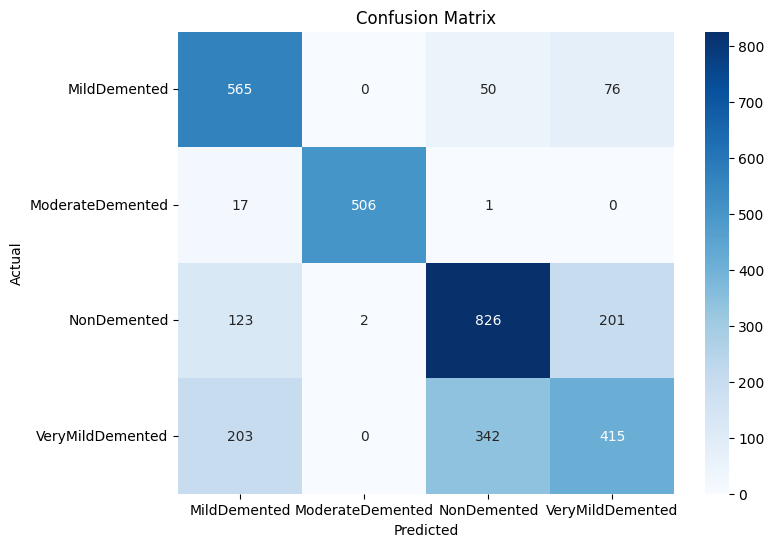

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict class probabilities
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# True labels
y_true = test_generator.classes

# Class label names
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import os
from collections import defaultdict

def analyze_dataset_images(dataset_dir):
    print(f"Analyzing dataset in: {dataset_dir}\n")
    class_image_counts = defaultdict(int)

    for root, dirs, files in os.walk(dataset_dir):
        image_files = [f for f in files if f.lower().endswith(('.jpg', '.jpeg', '.png', '.gif'))]
        if image_files:
            class_name = os.path.basename(root)
            class_image_counts[root] += len(image_files)

    if not class_image_counts:
        print("No images found in the dataset.")
    else:
        for class_path, count in class_image_counts.items():
            print(f"Folder: {class_path}")
            print(f"  Contains {count} image(s)")
            print("-" * 40)

# Replace with your actual dataset directory path
dataset_dir = '/content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset'
analyze_dataset_images(dataset_dir)

Analyzing dataset in: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset

Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/train/MildDemented
  Contains 2048 image(s)
----------------------------------------
Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/train/ModerateDemented
  Contains 2048 image(s)
----------------------------------------
Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/train/NonDemented
  Contains 2048 image(s)
----------------------------------------
Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/train/VeryMildDemented
  Contains 2048 image(s)
----------------------------------------
Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/test/MildDemented
  Contains 691 image(s)
----------------------------------------
Folder: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/test/Mode

In [ ]:
import os
import shutil

def is_image_file(filename):
    return filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff'))

def save_balanced_dataset(src_root, dest_root):
    os.makedirs(dest_root, exist_ok=True)

    for split in ['train', 'test']:  # or 'val' if you have validation too
        src_split_path = os.path.join(src_root, split)
        dest_split_path = os.path.join(dest_root, split)

        if not os.path.exists(src_split_path):
            print(f"Skipping missing split: {src_split_path}")
            continue

        for class_name in os.listdir(src_split_path):
            src_class_path = os.path.join(src_split_path, class_name)
            dest_class_path = os.path.join(dest_split_path, class_name)
            os.makedirs(dest_class_path, exist_ok=True)

            for file_name in os.listdir(src_class_path):
                src_file = os.path.join(src_class_path, file_name)
                if os.path.isfile(src_file) and is_image_file(file_name):
                    dest_file = os.path.join(dest_class_path, file_name)
                    shutil.copy2(src_file, dest_file)

    print(f"\n✅ Balanced dataset copied to: {dest_root}")

# Example paths — update to match your actual setup
source_dir = '/content/alzt_data/Alzheimer_s Dataset'
destination_dir = '/content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset'

save_balanced_dataset(source_dir, destination_dir)


✅ Balanced dataset copied to: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset


In [ ]:
# Save model in .keras format
model.save('/content/Alzheimer_CNN_Final.keras')

In [ ]:
# Evaluate model performance
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

104/104 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.6926 - loss: 0.7163
Validation Loss: 0.7111
Validation Accuracy: 69.49%


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input

# === Load saved model
model_seq = tf.keras.models.load_model("/content/Alzheimer_CNN_Final.keras")
# inner_seq = model_seq.get_layer("sequential_1")  <- Remove this line

# Assuming 'conv2d_5' is your desired layer (check model summary)
target_layer_name = 'conv2d_5'
inner_seq = model_seq  # or model_seq.get_layer(target_layer_name) if it's a direct child

for i, layer in enumerate(inner_seq.layers):
    print(f"{i}: {layer.name} - {type(layer)}")

0: conv2d - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
1: conv2d_1 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
2: max_pooling2d - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
3: conv2d_2 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
4: conv2d_3 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
5: max_pooling2d_1 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
6: conv2d_4 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
7: conv2d_5 - <class 'keras.src.layers.convolutional.conv2d.Conv2D'>
8: max_pooling2d_2 - <class 'keras.src.layers.pooling.max_pooling2d.MaxPooling2D'>
9: flatten - <class 'keras.src.layers.reshaping.flatten.Flatten'>
10: dense - <class 'keras.src.layers.core.dense.Dense'>
11: dropout - <class 'keras.src.layers.regularization.dropout.Dropout'>
12: dense_1 - <class 'keras.src.layers.core.dense.Dense'>


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


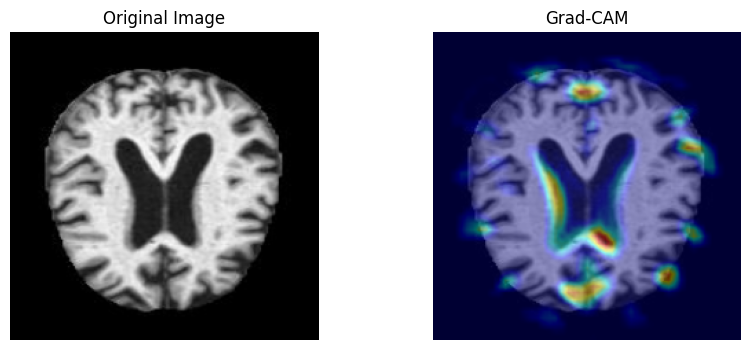

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Reconstruct a Functional model to get both conv2d_5 output and final prediction
from tensorflow.keras.models import Model
from tensorflow.keras import Input

# Step 1: Input
input_tensor = Input(shape=(224, 224, 3))

# Step 2: Pass through inner_seq layer by layer
x = input_tensor
conv_output = None
for layer in inner_seq.layers:
    x = layer(x)
    if layer.name == "conv2d_5":
        conv_output = x  # Save output of target conv layer

# Step 3: Final output (x is already the final prediction from inner_seq)
final_output = x

# Step 4: Build model
grad_model = Model(inputs=input_tensor, outputs=[conv_output, final_output])

# Warm-up
_ = grad_model(tf.random.normal((1, 224, 224, 3)))



# === Grad-CAM function
def show_gradcam(img_path, grad_model, class_index):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_tensor = tf.expand_dims(img_array, axis=0)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-10)

    img_orig = cv2.imread(img_path)
    img_orig = cv2.resize(img_orig, (224, 224))
    heatmap = cv2.resize(heatmap.numpy(), (224, 224))
    heatmap = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img_orig, 0.6, heatmap_color, 0.4, 0)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Grad-CAM")
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

img_path = "/content/alzt_data/Alzheimer_s Dataset/test/MildDemented/26 (19).jpg"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
preds = model_seq.predict(np.expand_dims(img_array, axis=0))
pred_class = np.argmax(preds[0])

show_gradcam(img_path, grad_model, pred_class)

In [ ]:
# Save to Google Drive
!cp /content/Alzheimer_CNN_Final.keras /content/drive/MyDrive/

In [ ]:
!pip install mlflow

import mlflow
mlflow.set_experiment("Alzheimer Detection")

with mlflow.start_run():
    mlflow.log_param("optimizer", "Adam")
    mlflow.log_param("epochs", 50)
    mlflow.log_metric("val_accuracy", history.history['val_accuracy'][-1])
    mlflow.keras.log_model(model, "model")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.2 MB/s eta 0:00:00


2025/05/02 15:12:47 INFO mlflow.tracking.fluent: Experiment with name 'Alzheimer Detection' does not exist. Creating a new experiment.
2025/05/02 15:12:47 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2025/05/02 15:13:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Update the model path if yours is different
model_path = "/content/drive/MyDrive/Alzheimer_CNN_Final.keras"
model = tf.keras.models.load_model(model_path)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    18,874,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,325,322 (146.20 MB)

 Trainable params: 19,162,660 (73.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,162,662 (73.10 MB)

In [ ]:
extract_path = "/content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset"

In [ ]:
import os

# Choose class and get one image path
class_name = "MildDemented"
img_dir = os.path.join(extract_path, "test", class_name)

# Get first image in class folder
img_list = os.listdir(img_dir)
img_path = os.path.join(img_dir, img_list[0])  # pick first image

print("Using test image:", img_path)

Using test image: /content/drive/MyDrive/content/alzt_data/balanced_Alzheimer_s Dataset/test/MildDemented/28 (14).jpg


In [ ]:
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model("/content/drive/MyDrive/alz_model.keras")

# Load image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_array, axis=0)

# Predict
preds = model.predict(img_tensor)
pred_class = np.argmax(preds[0])

# Class labels (adjust if needed)
class_labels = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]
print(f"Predicted class: {class_labels[pred_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: VeryMildDemented


In [ ]:
export_dir = "/content/drive/MyDrive/deployed_alz_model"
model.save(export_dir + ".keras")  # Use .keras extension for saving
print("Model exported to:", export_dir + ".keras")

Model exported to: /content/drive/MyDrive/deployed_alz_model.keras
